<a href="https://colab.research.google.com/github/2019mohamed/Efficient-enumeration-of-chordless-cycles/blob/main/Efficient_enumeration_of_chordless_cycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

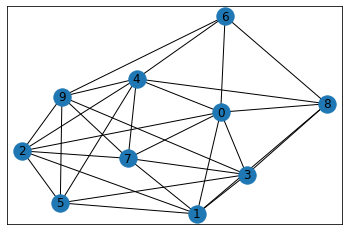

[[1, 2, 0], [1, 3, 0], [2, 4, 0], [2, 5, 1], [3, 5, 1], [4, 5, 2], [9, 5, 2], [9, 5, 3], [9, 5, 4], [4, 6, 0], [8, 6, 0], [8, 6, 4], [9, 6, 4], [1, 7, 0], [2, 7, 0], [2, 7, 1], [3, 7, 0], [3, 7, 1], [4, 7, 0], [4, 7, 2], [1, 8, 0], [3, 8, 0], [3, 8, 1], [4, 8, 0], [4, 9, 2], [7, 9, 2], [7, 9, 3], [7, 9, 4], [3, 5, 2, 0], [3, 5, 2, 7], [4, 5, 1, 0], [4, 5, 1, 7], [4, 5, 3, 0], [4, 5, 3, 7], [9, 5, 1, 7], [8, 6, 9, 2, 1], [8, 6, 9, 3], [8, 6, 9, 5, 1], [8, 6, 9, 7, 1], [9, 6, 0, 1, 5], [9, 6, 0, 2], [9, 6, 0, 3], [9, 6, 0, 7], [4, 8, 1, 2], [4, 8, 1, 5], [4, 8, 1, 7], [4, 8, 3, 5], [4, 8, 3, 7], [4, 8, 3, 9], [3, 9, 2, 0], [3, 9, 2, 1], [4, 9, 3, 0]]


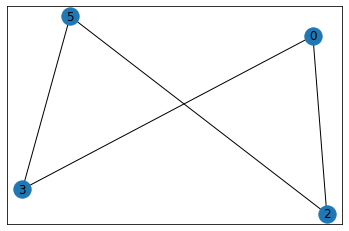

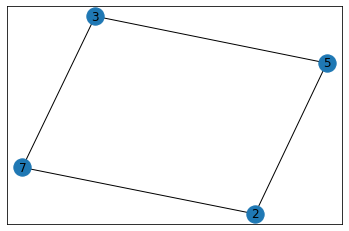

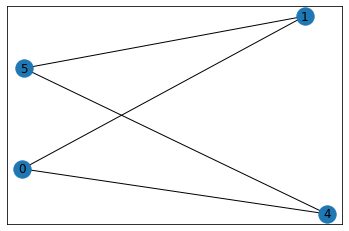

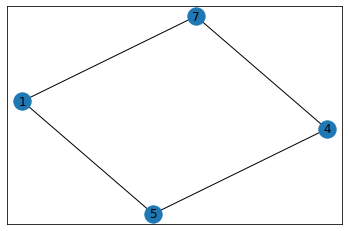

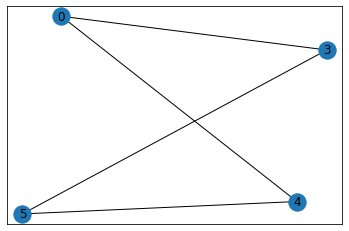

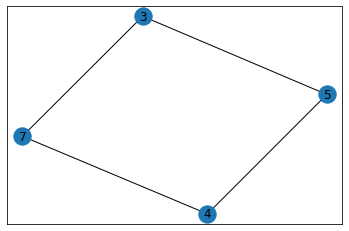

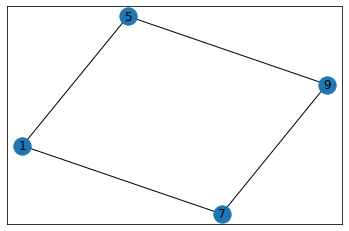

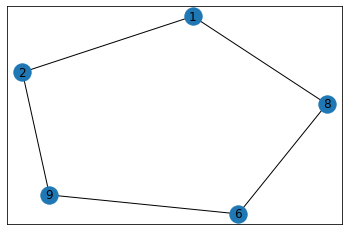

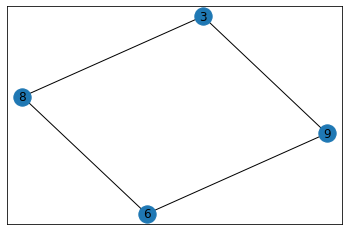

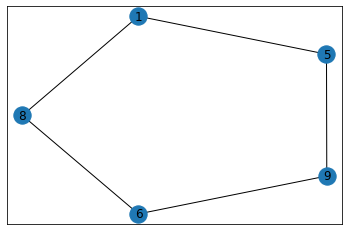

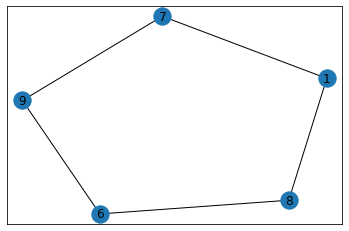

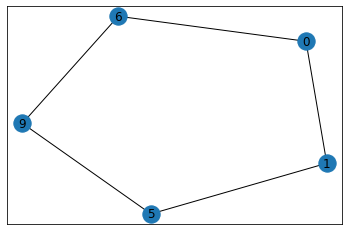

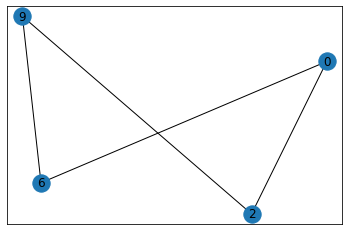

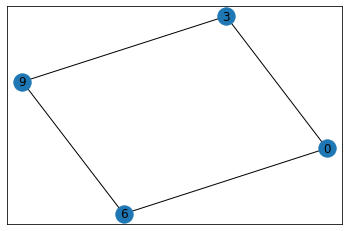

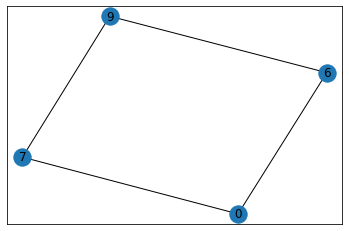

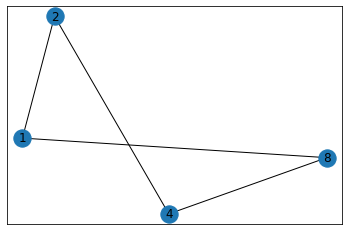

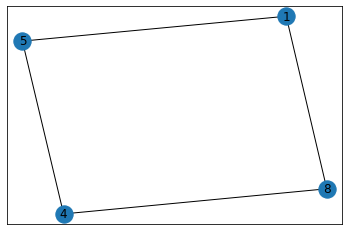

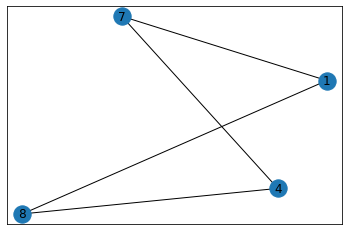

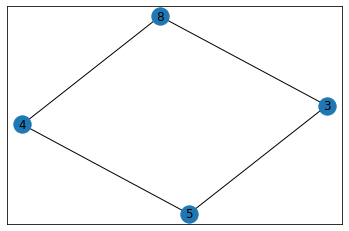

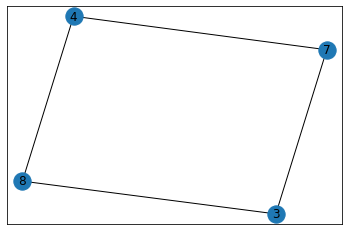

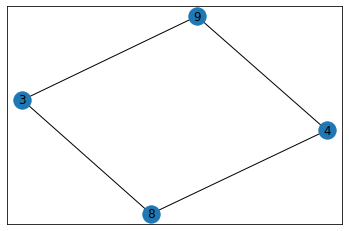

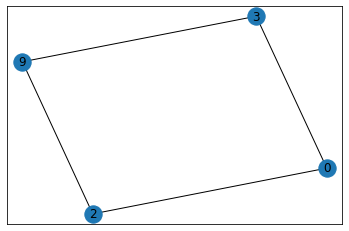

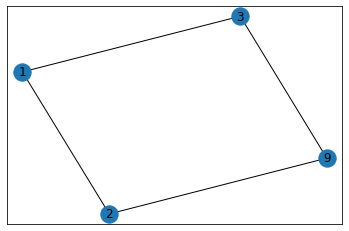

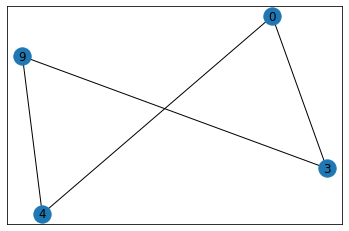

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations


g = nx.generators.fast_gnp_random_graph(10,0.6)
nx.draw_networkx(g)
plt.show()

def DegreeLabeling(g):#white 0 , black 1
  for u in g.nodes():
    g.nodes[u]['color'] = 0
    g.nodes[u]['degree'] = g.degree(u)
  
  v = -1
  for i in range(len(g)):
    min_degree = len(g)
    for x in g.nodes():
      if g.nodes[x]['color'] == 0 and g.nodes[x]['degree'] < min_degree:
        v = x
        min_degree = g.degree(x)
    
    g.nodes[v]['label'] = i
    g.nodes[v]['color'] = 1

    for u in g[v]:
      if g.nodes[u]['color'] == 0:
        g.nodes[u]['degree'] -= 1

  return g

def Triplets(g):
  T,C = list() , list()

  for u in g.nodes():
    for x,y in list(permutations(g[u], 2)):
      if g.nodes[u]['label'] < g.nodes[x]['label'] < g.nodes[y]['label']:
        if y in g[x]:
          C.append([x ,u , y])
        else:
          T.append([x , u , y])
  return T,C


def BlockNeighbors (u, g):
  for v in g[u]:
    g.nodes[v]['blocked'] += 1

def UnblockNeighbors (u, g):
  for v in g[u]:
    if g.nodes[v]['blocked'] > 0:
      g.nodes[v]['blocked'] -= 1

def CC_Visit (p,C,key,g):
  u_t = p[-1]
  BlockNeighbors(u_t ,g)

  for v in g[u_t]:
    if g.nodes[v]['label'] > key and g.nodes[v]['blocked'] == 1:
      p_ = p + [v]
      if p[0] in g[v]:
        C.append(p_)
      else:
        CC_Visit(p_ , C , key , g)
  
  UnblockNeighbors(u_t , g)

  return C

def ChordlessCycles(g):
  g = DegreeLabeling(g)
  T,C  = Triplets(g)

  for u in g.nodes():
    g.nodes[u]['blocked'] = 0
  
  while len(T) != 0:
    p = T[0]# p = (x,u,y)
    del T[0]
    u = p[1]
    BlockNeighbors(u,g)
    key = g.nodes[u]['label']
    C = CC_Visit(p , C , key , g)
    UnblockNeighbors(u,g)
  
  return C

Cs = ChordlessCycles(g)
print(Cs)

for c in Cs:
  if len(c) > 3:
    h = g.subgraph(c)
    nx.draw_networkx(h)
    plt.show()
